In [1]:
import requests
import time
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os

In [2]:
from sqlalchemy import create_engine, inspect

In [3]:
from datetime import timedelta

In [4]:
from patsy import dmatrices

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.metrics import roc_curve, auc

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
from sklearn import pipeline, preprocessing

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
df=pd.read_csv('start-up.csv',index_col=0 )

In [14]:
df.columns

Index(['permalink', 'company_name', 'category_code', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'founded_at', 'founded_month', 'founded_quarter',
       'founded_year', 'first_funding_at', 'last_funding_at',
       'last_milestone_at', 'days_in_op', 'first_funding_dayinop',
       'last_funding_dayinop', 'sa_funded_at', 'sa_raised_amount_usd',
       'sa_funded_daysop', 'ag_funded_at', 'ag_raised_amount_usd',
       've_funded_at', 've_raised_amount_usd', 'ag_funded_daysop',
       've_funded_daysop', 'CA', 'NY', 'MA', 'TX', 'WA', 'cr_funded_at',
       'cr_raised_amount_usd', 'cr_funded_daysop', 'ave_inf_y', 'adj_base2018',
       'sa_raised_amount_usd_adj', 'ag_raised_amount_usd_adj',
       've_raised_amount_usd_adj', 'cr_raised_amount_usd_adj'],
      dtype='object')

In [15]:
y1,X1=dmatrices('''status ~ category_code  + CA + NY + MA + TX + WA + founded_month 
                + first_funding_dayinop + ave_inf_y 
                + sa_funded_daysop + sa_raised_amount_usd_adj
                + ag_funded_daysop + ag_raised_amount_usd_adj
                + cr_funded_daysop + cr_raised_amount_usd_adj''',data=df,return_type='dataframe')

In [16]:
X1=X1.drop(columns='Intercept')

In [17]:
X1


,category_code[T.analytics],category_code[T.automotive],category_code[T.biotech],category_code[T.cleantech],category_code[T.consulting],category_code[T.design],category_code[T.ecommerce],category_code[T.education],category_code[T.enterprise],category_code[T.fashion],...,TX,WA,founded_month,first_funding_dayinop,ave_inf_y,sa_funded_daysop,sa_raised_amount_usd_adj,ag_raised_amount_usd_adj,cr_funded_daysop,cr_raised_amount_usd_adj
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6.0,29.0,22.191313,29.0,2293200.00,0.00,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,7.0,-181.0,21.025859,230.0,10788000.00,13050.00,0.0,0.00
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,9.0,47.0,21.721111,0.0,2670000.00,667500.00,0.0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,3719.0,16.393939,0.0,9520000.00,0.00,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,122.0,21.721111,0.0,890000.00,506410.00,0.0,0.00
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,451.0,19.943636,451.0,2296000.00,0.00,0.0,0.00
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,-194.0,21.025859,-194.0,2112795.00,0.00,0.0,0.00
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,124.0,21.025859,0.0,7830000.00,435000.00,0.0,0.00
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,17.0,20.670404,0.0,13600000.00,42500.00,0.0,0.00
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,4488.0,12.202020,4488.0,6383000.00,0.00,0.0,0.00


In [18]:
y1['status[acquired]'].sum()/len(y1)

0.123859905144108

In [19]:
y1_ac=y1['status[acquired]']

0.5074344481080233


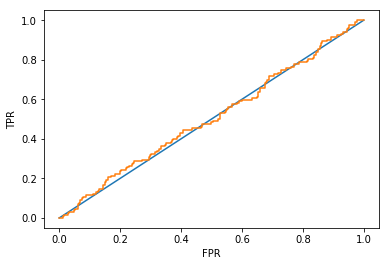

In [20]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)
log_ac = LogisticRegression()
log_ac.fit(X1_train,y1_ac_train)
y_score=log_ac.predict_proba(X1_test)[:,1]

fpr1_ac, tpr1_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc1_ac = auc(fpr1_ac, tpr1_ac)


plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac,tpr1_ac)
plt.xlabel('FPR')
plt.ylabel('TPR');
print(roc_auc1_ac)

In [21]:
y1['status[ipo]'].sum()/len(y1)

0.02553812477198103

In [22]:
y1_ipo=y1['status[ipo]']

0.5291995189095282


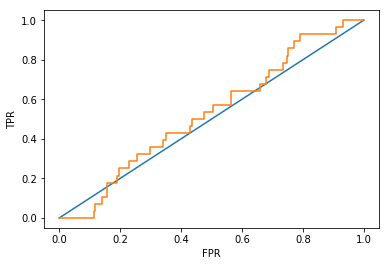

In [23]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)
log_ipo = LogisticRegression()
log_ipo.fit(X1_train,y1_ipo_train)
y_score=log_ipo.predict_proba(X1_test)[:,1]

fpr1_ipo, tpr1_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc1_ipo = auc(fpr1_ipo, tpr1_ipo)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo,tpr1_ipo)
plt.xlabel('FPR')
plt.ylabel('TPR');
print(roc_auc1_ipo)

In [24]:
X1_train_n,X1_test_n, y1_ac_train_n, y1_ac_test_n = train_test_split(X1,y1_ac,test_size=0.2, random_state=42)

log_ac_n=pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ( 'log', LogisticRegression())
])

log_ac_n.fit(X1_train_n,y1_ac_train_n)
y_score=log_ac_n.predict_proba(X1_test_n)[:,1]

fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test_n, y_score)
roc_auc1_ac_n = auc(fpr1_ac_n, tpr1_ac_n)
print(roc_auc1_ac_n)

0.7410504003768252


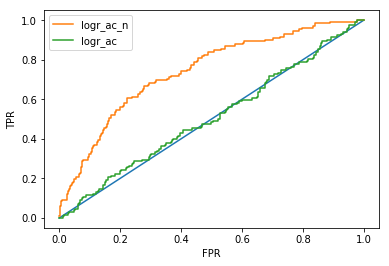

In [25]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='logr_ac_n')
plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best');


In [26]:
X1_train_n2,X1_test_n2, y1_ipo_train_n, y1_ipo_test_n =train_test_split(X1,y1_ipo,test_size=0.2, random_state=42)

log_ipo_n=pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ( 'log', LogisticRegression(penalty='l1'))
])

log_ipo_n.fit(X1_train_n2,y1_ipo_train_n)
y_score=log_ipo_n.predict_proba(X1_test_n2)[:,1]

fpr1_ipo_n, tpr1_ipo_n,_ = roc_curve(y1_ipo_test_n, y_score)
roc_auc1_ipo_n = auc(fpr1_ipo_n, tpr1_ipo_n)
print(roc_auc1_ipo_n)

0.8759187491647735


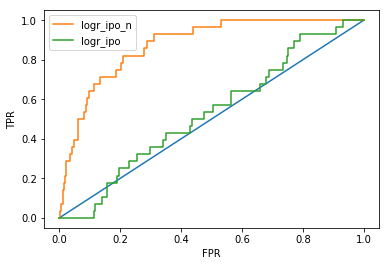

In [27]:
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='logr_ipo_n')
plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ipo')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best');

In [28]:
log_ac_n.named_steps['log'].coef_[0]

array([-7.98181460e-02, -3.99500617e-02, -2.49114755e-01, -1.55267777e-02,
       -5.24613125e-02, -1.39151574e-01, -2.70272264e-01, -6.63280953e-02,
       -2.03509240e-02,  1.98296763e-03, -9.13500556e-02, -3.58746009e-02,
       -1.00152264e-01, -1.18738412e-01, -7.67407849e-02, -9.00390582e-02,
       -1.08573488e-01, -1.05201130e-01, -1.60996150e-01,  2.59277732e-02,
        5.97000667e-03, -8.17114103e-03, -2.30508444e-01, -4.92764507e-03,
       -2.95372630e-02, -2.19747104e-01, -6.88459059e-02, -8.88285441e-02,
        2.90617033e-02, -4.31573079e-02, -5.00923983e-02, -3.56763893e-02,
        1.23129118e-02, -2.76883442e-02,  1.62394680e-02, -1.95080402e-01,
       -2.38737183e-01, -1.98915786e-01,  3.38118654e-02,  5.56376895e-03,
        0.00000000e+00,  0.00000000e+00, -5.09153115e-02, -5.45304530e-02,
       -6.70995821e-02,  0.00000000e+00, -4.21040139e-02,  0.00000000e+00,
       -2.16735253e-02, -3.75751293e-02, -3.68257889e-02, -8.46815917e-02,
       -1.47318083e-01,  

0.6342953590636393


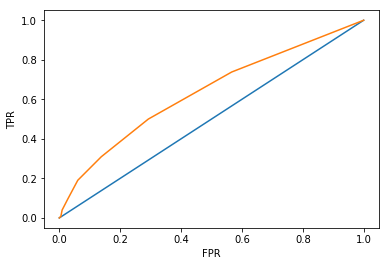

In [29]:
X1_train_f,X1_test_f, y1_ac_train_f, y1_ac_test_f = train_test_split(X1,y1_ac,test_size=0.2)
randomforest_ac = RandomForestClassifier()
randomforest_ac.fit(X1_train_f,y1_ac_train_f)
y_score=randomforest_ac.predict_proba(X1_test_f)[:,1]

fpr2_ac, tpr2_ac,_ = roc_curve(y1_ac_test_f, y_score)
roc_auc2_ac = auc(fpr2_ac, tpr2_ac)


plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr2_ac,tpr2_ac)
plt.xlabel('FPR')
plt.ylabel('TPR');
print(roc_auc2_ac)

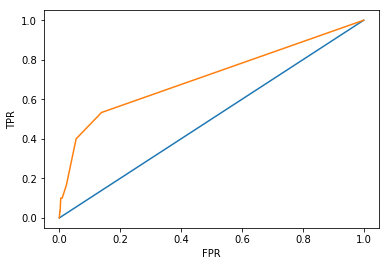

In [30]:
X1_train_f2,X1_test_f2, y1_ipo_train_f, y1_ipo_test_f = train_test_split(X1,y1_ipo,test_size=0.2)
randomforest_ipo = RandomForestClassifier()
randomforest_ipo.fit(X1_train_f2,y1_ipo_train_f)

y_score=randomforest_ipo.predict_proba(X1_test_f2)[:,1]
fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test_f, y_score)
roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

y_score_train=randomforest_ipo.predict_proba(X1_train_f2)[:,1]
fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train_f, y_score_train)
roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr2_ipo,tpr2_ipo)
plt.xlabel('FPR')
plt.ylabel('TPR');

  

In [31]:
def rforest(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    randomforest_ipo = RandomForestClassifier()
    randomforest_ipo.fit(X1_train,y1_ipo_train)
    
    y_score=randomforest_ipo.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)
    
    y_score_train=randomforest_ipo.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
    
    return roc_auc2_ipo,roc_auc2_ipo_train

In [32]:
def rforest_afew_times(X1, y1_ipo, n=10):
    return (pd.DataFrame([rforest(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [33]:
rforest_afew_times(X1, y1_ac, n=10)

Test auc     0.640397
Train auc    0.999534
dtype: float64

In [34]:
rforest_afew_times(X1, y1_ipo, n=10)

Test auc     0.709752
Train auc    0.999914
dtype: float64

In [35]:
def logregn(X1,y1_ac):
    
    X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)

    log_ac_n=pipeline.Pipeline([
        ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
        ( 'log', LogisticRegression())
    ])

    log_ac_n.fit(X1_train,y1_ac_train)
    
    y_score=log_ac_n.predict_proba(X1_test)[:,1]
    
    fpr1_ac_n, tpr1_ac_n,_ = roc_curve(y1_ac_test, y_score)
    roc_auc1_ac_n = auc(fpr1_ac_n, tpr1_ac_n)
    
    y_score=log_ac_n.predict_proba(X1_train)[:,1]
    fpr1_ac_n_train, tpr1_ac_n_train,_ = roc_curve(y1_ac_train, y_score)
    roc_auc1_ac_n_train = auc(fpr1_ac_n_train, tpr1_ac_n_train)
    
    return roc_auc1_ac_n, roc_auc1_ac_n_train

In [36]:
def logregn_afew_times(X1, y1_ipo, n=10):
    return (pd.DataFrame([logregn(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [37]:
logregn_afew_times(X1, y1_ac, n=10)

Test auc     0.751182
Train auc    0.764426
dtype: float64

In [38]:
logregn_afew_times(X1, y1_ipo, n=10)

Test auc     0.823117
Train auc    0.889337
dtype: float64

In [129]:
def cv_GBC(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    

    learning_rates = np.logspace(-4, -0.5, 30)
    max_features= range(1,5)
    tuned_parameters = [{'learning_rate': learning_rates, 'max_features':max_features,'n_estimators':[300] }]
    n_folds = 3

    
    GBC=GridSearchCV(GradientBoostingClassifier(), tuned_parameters, scoring='roc_auc', cv=n_folds, refit=True)
    

    GBC.fit(X1_train,y1_ipo_train)
    
    y_score=GBC.predict_proba(X1_test)[:,1]
    fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)
    
    y_score_train=GBC.predict_proba(X1_train)[:,1]
    fpr3_ipo_train, tpr3_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc3_ipo_train = auc(fpr3_ipo_train, tpr3_ipo_train)
    
#     plt.figure()
#     # Plotting our Baseline..
#     plt.plot([0,1],[0,1])
#     plt.plot(fpr2_ipo,tpr2_ipo)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR');
    
    return roc_auc3_ipo,roc_auc3_ipo_train,GBC,X1_train,X1_test, y1_ipo_train, y1_ipo_test

In [132]:
def cv_GBC_afew_times(X1, y1_ipo, n=10):
    info= pd.DataFrame([cv_GBC(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test'])
    return info

In [143]:
info_ipo=cv_GBC_afew_times(X1, y1_ipo, n=5)

In [146]:
info_ipo


,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.848256,0.941141,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,701 0.0 1079 0.0 3937 0.0 1180 0....,4253 0.0 4810 0.0 1685 0.0 122 0....
1,0.882512,0.929643,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2922 0.0 3228 0.0 3866 0.0 4181 0....,579 0.0 3962 0.0 896 1.0 4595 0....
2,0.864268,0.938396,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,4441 0.0 578 0.0 2696 0.0 5141 0....,4480 0.0 924 0.0 3403 0.0 4517 0....
3,0.880084,0.936273,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,385 0.0 2969 0.0 4077 0.0 2028 0....,2141 0.0 2186 0.0 4608 0.0 4272 0....
4,0.831838,0.939099,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1997 0.0 1258 0.0 4680 0.0 5233 0....,2928 0.0 5137 0.0 1107 0.0 511 0....


In [147]:
X1_train_g2=info_ipo['X1_train'][1]
X1_test_g2=info_ipo['X1_test'][1]
y1_ipo_test_g=info_ipo['y1_test'][1]
y1_ipo_train_g=info_ipo['y1_train'][1]
GBC_ipo=info_ipo['Model'][1]

In [148]:
np.mean(info_ipo['Train auc'])

0.9369102346360718

In [149]:
np.mean(info_ipo['Test auc'])

0.861391647613571

In [150]:
y_score=GBC_ipo.predict_proba(X1_test_g2)[:,1]
fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test_g, y_score)
roc_auc3_ipo = auc(fpr3_ipo, tpr3_ipo)

In [144]:
info_ac=cv_GBC_afew_times(X1, y1_ac, n=5)

In [145]:
info_ac

,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.741795,0.877457,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,552 0.0 5369 0.0 3721 1.0 880 0....,3633 0.0 4321 0.0 1108 0.0 681 0....
1,0.675012,0.869996,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,472 0.0 3566 0.0 2716 1.0 2529 1....,2145 0.0 3557 0.0 4074 0.0 3742 0....
2,0.748160,0.887914,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,407 0.0 1765 0.0 2266 0.0 1055 0....,2985 0.0 590 1.0 2320 1.0 1276 1....
3,0.763323,0.880014,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,5600 0.0 1019 0.0 5585 0.0 3114 0....,5342 0.0 4010 0.0 5531 0.0 2069 0....
4,0.707448,0.873593,"GridSearchCV(cv=3, error_score='raise',\n ...",category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,5056 0.0 4627 1.0 2337 0.0 2871 0....,3493 0.0 530 0.0 5072 0.0 1253 0....


In [151]:
X1_train_g=info_ac['X1_train'][3]
X1_test_g=info_ac['X1_test'][3]
y1_ac_test_g=info_ac['y1_test'][3]
y1_ac_train_g=info_ac['y1_train'][3]
GBC_ac=info_ac['Model'][3]

In [152]:
np.mean(info_ac['Train auc'])

0.877794705621934

In [153]:
np.mean(info_ac['Test auc'])

0.7271473152752319

In [154]:
y_score=GBC_ac.predict_proba(X1_test_g)[:,1]

fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test_g, y_score)
roc_auc3_ac = auc(fpr3_ac, tpr3_ac)

In [155]:
roc_auc3_ac

0.7633226312471596

In [204]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)



SVC1_ipo =pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ('SvC', SVC(probability=True))
])


SVC1_ipo.fit(X1_train,y1_ipo_train)

y_score=SVC1_ipo.predict_proba(X1_test)[:,1]
fpr4_ipo, tpr4_ipo,_ = roc_curve(y1_ipo_test, y_score)
roc_auc4_ipo = auc(fpr4_ipo, tpr4_ipo)


In [205]:
X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)
SVC1 =pipeline.Pipeline([
    ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
    ('SvC', SVC(probability=True))
])

SVC1_ac.fit(X1_train,y1_ac_train)

y_score=SVC1_ac.predict_proba(X1_test)[:,1]
fpr4_ac, tpr4_ac,_ = roc_curve(y1_ac_test, y_score)
roc_auc4_ac = auc(fpr4_ac, tpr4_ac)

In [53]:
def mod_SVC(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    SVC1 =pipeline.Pipeline([
            ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
            ( 'SvC', SVC(probability=True,C=5))
        ])

    SVC1.fit(X1_train,y1_ipo_train)

    y_score=SVC1.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=SVC1.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
#     plt.figure()
#     # Plotting our Baseline..
#     plt.plot([0,1],[0,1])
#     plt.plot(fpr2_ipo,tpr2_ipo)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR');
    
    return roc_auc2_ipo,roc_auc2_ipo_train

In [54]:
def mod_SVC_afew_times(X1, y1_ipo,n=10):
    return (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [55]:
mod_SVC_afew_times(X1, y1_ipo,n=10)

Test auc     0.738986
Train auc    0.942078
dtype: float64

In [56]:
mod_SVC_afew_times(X1, y1_ac,n=10)

Test auc     0.632650
Train auc    0.838697
dtype: float64

In [206]:
X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)

# parameters = {'kernel':('linear', 'rbf','poly'), 'gamma': np.logspace(-2, 2, 10),'C':[1, 10],'probability':[True]}

SVC1_ipo =pipeline.Pipeline([
        ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
        ( 'SvC', SVC(kernel='linear', probability=True))
    ])

SVC1_ipo.fit(X1_train,y1_ipo_train)

y_score=SVC1_ipo.predict_proba(X1_test)[:,1]
fpr5_ipo, tpr5_ipo,_ = roc_curve(y1_ipo_test, y_score)


X1_train,X1_test, y1_ac_train, y1_ac_test = train_test_split(X1,y1_ac,test_size=0.2)
SVC1_ac =pipeline.Pipeline([
        ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
        ( 'SvC', SVC(kernel='linear', probability=True))
    ])

SVC1_ac.fit(X1_train,y1_ac_train)

y_score=SVC1_ac.predict_proba(X1_test)[:,1]
fpr5_ac, tpr5_ac,_ = roc_curve(y1_ac_test, y_score)

In [201]:
roc_auc5_ipo = auc(fpr5_ac, tpr5_ac)
roc_auc5_ipo

0.5345633401584617

In [58]:
def mod_SVC(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    SVC1 =pipeline.Pipeline([
            ('standardscaler',preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)),
            ( 'SvC', SVC(kernel='linear', probability=True))
        ])

    SVC1.fit(X1_train,y1_ipo_train)

    y_score=SVC1.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=SVC1.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
#     plt.figure()
#     # Plotting our Baseline..
#     plt.plot([0,1],[0,1])
#     plt.plot(fpr2_ipo,tpr2_ipo)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR');
    
    return roc_auc2_ipo,roc_auc2_ipo_train

In [ ]:
def mod_SVC_afew_times(X1, y1_ipo,n=10):
    return (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc'])).mean()

In [59]:
mod_SVC_afew_times(X1, y1_ipo,n=10)

Test auc     0.494792
Train auc    0.551287
dtype: float64

In [60]:
mod_SVC_afew_times(X1, y1_ac,n=10)

Test auc     0.472725
Train auc    0.483225
dtype: float64

In [165]:
def cv_Bayes(X1, y1_ipo):
    X1_train,X1_test, y1_ipo_train, y1_ipo_test = train_test_split(X1,y1_ipo,test_size=0.2)
    
    bayes = naive_bayes.GaussianNB() # The likelihood of the features is assumed to be Gaussian
   
    bayes.fit(X1_train,y1_ipo_train)

    y_score=bayes.predict_proba(X1_test)[:,1]
    fpr2_ipo, tpr2_ipo,_ = roc_curve(y1_ipo_test, y_score)
    roc_auc2_ipo = auc(fpr2_ipo, tpr2_ipo)

    y_score_train=bayes.predict_proba(X1_train)[:,1]
    fpr2_ipo_train, tpr2_ipo_train,_ = roc_curve(y1_ipo_train, y_score_train)
    roc_auc2_ipo_train = auc(fpr2_ipo_train, tpr2_ipo_train)
    
#     plt.figure()
#     # Plotting our Baseline..
#     plt.plot([0,1],[0,1])
#     plt.plot(fpr2_ipo,tpr2_ipo)
#     plt.xlabel('FPR')
#     plt.ylabel('TPR');
    
    return roc_auc2_ipo,roc_auc2_ipo_train,bayes,X1_train,X1_test, y1_ipo_train, y1_ipo_test

In [166]:
def Bayes_afew_times(X1, y1_ipo, n=10):
    info= (pd.DataFrame([cv_Bayes(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test']))
    
#         (pd.DataFrame([mod_SVC(X1, y1_ipo) for j in range(n)],
#                          columns=['Test auc','Train auc'])).mean()
                         
                         
    return info

In [167]:
info_b_ipo=Bayes_afew_times(X1, y1_ipo,n=10)

In [168]:
info_b_ipo

,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.746829,0.787819,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2340 0.0 2845 0.0 2201 0.0 2199 0....,3653 0.0 5183 0.0 1246 1.0 1012 0....
1,0.702593,0.802730,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,999 0.0 4931 0.0 5490 0.0 1497 0....,5246 0.0 1859 0.0 3705 0.0 3320 0....
2,0.843460,0.770828,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1314 0.0 3320 0.0 1665 0.0 1807 0....,848 0.0 2326 0.0 3022 0.0 1043 0....
3,0.819707,0.760611,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,3654 0.0 2487 0.0 616 0.0 5448 0....,771 0.0 4699 0.0 1701 0.0 5800 0....
4,0.802729,0.778225,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,4856 0.0 2884 0.0 1974 0.0 2073 0....,2621 0.0 3762 0.0 3101 0.0 469 0....
5,0.839238,0.768938,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,3488 0.0 4736 0.0 3201 0.0 2468 0....,4735 0.0 3698 0.0 3842 0.0 463 0....
6,0.825742,0.776857,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,5069 0.0 4712 0.0 5048 0.0 3566 0....,2019 0.0 981 0.0 3615 0.0 4551 0....
7,0.802499,0.778131,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,4890 0.0 3609 0.0 1977 0.0 12 0....,3560 1.0 487 0.0 1079 0.0 579 0....
8,0.795841,0.781002,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,251 0.0 1413 0.0 3280 0.0 5322 0....,2969 0.0 5595 0.0 5295 0.0 2205 0....
9,0.765075,0.789522,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,502 0.0 4607 0.0 1976 0.0 1941 0....,4867 0.0 3225 0.0 5599 0.0 1113 0....


In [169]:
np.mean(info_b_ipo['Train auc'])

0.7794663456001711

In [170]:
np.mean(info_b_ipo['Test auc'])

0.7943712746672779

In [171]:
X1_train_b2=info_b_ipo['X1_train'][2]
X1_test_b2=info_b_ipo['X1_test'][2]
y1_ipo_test_b=info_b_ipo['y1_test'][2]
y1_ipo_train_b=info_b_ipo['y1_train'][2]
bayes_ipo=info_b_ipo['Model'][2]

In [172]:
y_score=bayes_ipo.predict_proba(X1_test_b2)[:,1]
fpr6_ipo, tpr6_ipo,_ = roc_curve(y1_ipo_test_b, y_score)
roc_auc6_ipo = auc(fpr6_ipo, tpr6_ipo)

In [173]:
info_b_ac=Bayes_afew_times(X1, y1_ac,n=10)

In [174]:
info_b_ac

,Test auc,Train auc,Model,X1_train,X1_test,y1_train,y1_test
0,0.545711,0.562645,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,632 0.0 1745 0.0 4768 0.0 3742 0....,1185 0.0 3394 0.0 1118 0.0 4399 0....
1,0.582333,0.537883,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,4825 0.0 4064 0.0 4541 0.0 1962 0....,4400 0.0 3058 0.0 179 1.0 4191 0....
2,0.559585,0.543951,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,1533 0.0 826 0.0 3565 0.0 3741 0....,3204 0.0 363 0.0 1365 0.0 3167 1....
3,0.494474,0.570888,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,882 0.0 1935 0.0 5161 0.0 3264 0....,4234 0.0 3773 0.0 452 0.0 5779 0....
4,0.534465,0.563345,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,528 0.0 2002 0.0 5531 0.0 5461 0....,3860 0.0 3507 1.0 974 0.0 3962 0....
5,0.531228,0.545903,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2463 0.0 972 0.0 4202 0.0 3352 0....,3527 0.0 934 0.0 4262 0.0 4549 0....
6,0.584834,0.545604,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,797 1.0 1804 0.0 872 1.0 1652 1....,3799 0.0 1531 0.0 1853 0.0 4342 0....
7,0.541544,0.561520,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,4867 0.0 1081 0.0 1660 0.0 5185 0....,1695 0.0 325 0.0 5202 1.0 1141 0....
8,0.539925,0.543156,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,601 0.0 975 0.0 622 0.0 215 0....,1210 1.0 624 1.0 4493 1.0 1107 0....
9,0.560892,0.561534,GaussianNB(priors=None),category_code[T.analytics] category_cod...,category_code[T.analytics] category_cod...,2716 1.0 2289 0.0 848 0.0 1404 0....,5438 0.0 2269 0.0 2702 0.0 3193 0....


In [175]:
np.mean(info_b_ac['Train auc'])

0.553642874066665

In [176]:
np.mean(info_b_ac['Test auc'])

0.547498877788547

In [177]:
X1_train_b=info_b_ac['X1_train'][6]
X1_test_b=info_b_ac['X1_test'][6]
y1_ac_test_b=info_b_ac['y1_test'][6]
y1_ac_train_b=info_b_ac['y1_train'][6]
bayes_ac=info_b_ac['Model'][6]

In [178]:
y_score=bayes_ac.predict_proba(X1_test_b)[:,1]
fpr6_ac, tpr6_ac,_ = roc_curve(y1_ac_test_b, y_score)
roc_auc6_ac = auc(fpr6_ac, tpr6_ac)

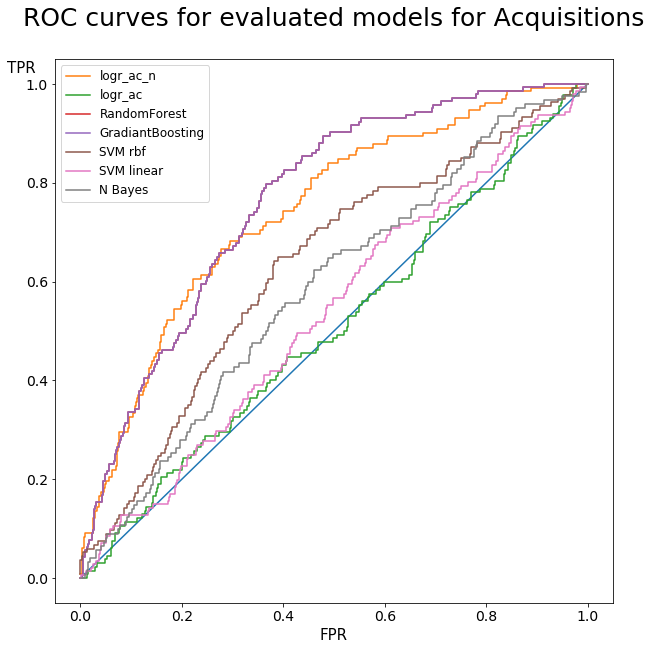

In [182]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ac_n,tpr1_ac_n,label='logr_ac_n')
plt.plot(fpr1_ac,tpr1_ac,label='logr_ac')
plt.plot(fpr3_ac,tpr3_ac,label='RandomForest')
plt.plot(fpr3_ac,tpr3_ac,label='GradiantBoosting')
plt.plot(fpr4_ac,tpr4_ac,label='SVM rbf')
plt.plot(fpr5_ac,tpr5_ac,label='SVM linear')
plt.plot(fpr6_ac,tpr6_ac,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for Acquisitions", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);


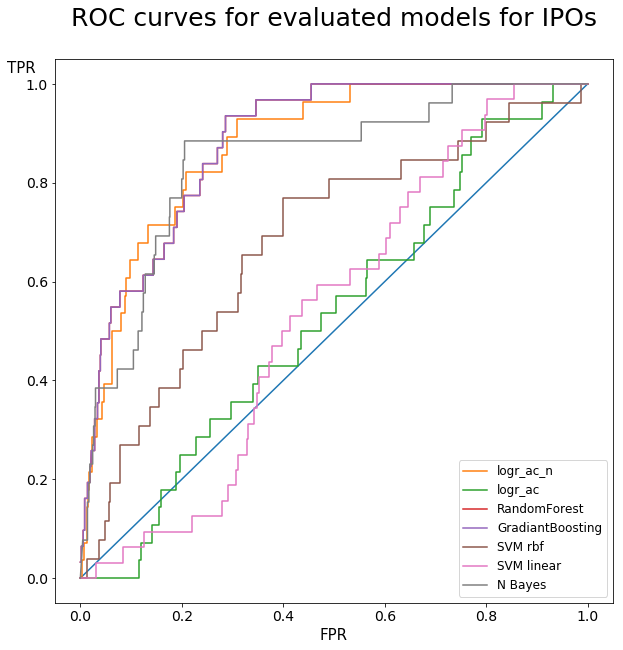

In [181]:

plt.figure(figsize= [10,10])
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr1_ipo_n,tpr1_ipo_n,label='logr_ac_n')
plt.plot(fpr1_ipo,tpr1_ipo,label='logr_ac')
plt.plot(fpr3_ipo,tpr3_ipo,label='RandomForest')
plt.plot(fpr3_ipo,tpr3_ipo,label='GradiantBoosting')
plt.plot(fpr4_ipo,tpr4_ipo,label='SVM rbf')
plt.plot(fpr5_ipo,tpr5_ipo,label='SVM linear')
plt.plot(fpr6_ipo,tpr6_ipo,label='N Bayes')
plt.xlabel('FPR', size = 15)
plt.ylabel('TPR', size = 15,rotation = 0,labelpad = 35)
plt.legend(loc='best',prop={'size': 12})
plt.title("ROC curves for evaluated models for IPOs", size = 25)
# plt.xlabel('Coefficients', size = 15, labelpad = 15)
# plt.ylabel('Variables        ', size = 20, rotation = 0, labelpad = 35)
plt.xticks(size=14)
plt.yticks(size=14)
ax = plt.gca()
ax.yaxis.set_label_coords(-0.06,0.97)
ttl = ax.title
ttl.set_position([.5, 1.05]);

In [183]:
roc_auc3_acm=[]

for i in np.linspace(0,1,100):
    y_score=GBC_ac.predict_proba(X1_test_g)[:,1]>i
    fpr3_ac, tpr3_ac,_ = roc_curve(y1_ac_test_g, y_score)
    roc_auc3_acm.append(auc(fpr3_ac, tpr3_ac))
    

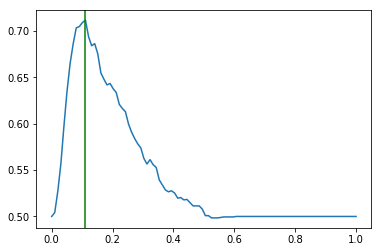

In [184]:
x=np.linspace(0,1,100)
y=roc_auc3_acm
plt.plot(x,y)
plt.axvline(x[np.argmax(roc_auc3_acm)], color='g', linestyle='solid');

In [185]:
max(roc_auc3_acm)

0.7113148905601735

In [186]:
roc_auc3_ipom=[]

for i in np.linspace(0,1,100):
   
    
    y_score=GBC_ipo.predict_proba(X1_test_g2)[:,1]>i
    fpr3_ipo, tpr3_ipo,_ = roc_curve(y1_ipo_test_g, y_score)
    roc_auc3_ipom.append(auc(fpr3_ipo, tpr3_ipo))

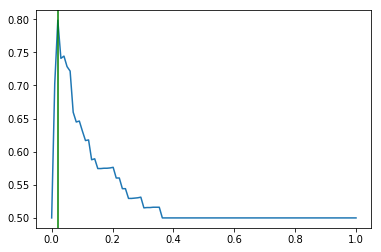

In [187]:
x=np.linspace(0,1,100)
y=roc_auc3_ipom
plt.plot(x,y)
plt.axvline(x[np.argmax(roc_auc3_ipom)], color='g', linestyle='solid');

In [188]:
max(roc_auc3_ipom)

0.7985232705925075

In [189]:
roc_auc3_ipo

0.8825122556436482

In [192]:
roc_auc_ac_n=[]

for i in np.linspace(0,1,100):
    y_score=log_ac_n.predict_proba(X1_test_n)[:,1]>i
    fpr_ac_n, tpr_ac_n,_ = roc_curve(y1_ipo_test_n, y_score)
    roc_auc_ac_n.append(auc(fpr_ac_n, tpr_ac_n))

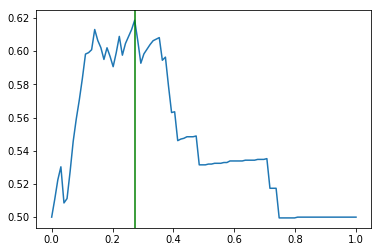

In [193]:
x=np.linspace(0,1,100)
y=roc_auc_ac_n
plt.plot(x,y)
plt.axvline(x[np.argmax(roc_auc_ac_n)], color='g', linestyle='solid');

In [196]:
x[np.argmax(roc_auc_ac_n)]

0.27272727272727276

In [197]:

y_ac_predlogn=log_ac_n.predict_proba(X1_test_n)[:,1]>x[np.argmax(roc_auc_ac_n)]

cm_ac_logn=confusion_matrix(y1_ac_test_n, y_ac_predlogn)
cm_ac_logn

array([[896,  69],
       [102,  30]])

In [198]:
print(classification_report(y1_ac_test_n, y_ac_predlogn))

             precision    recall  f1-score   support

        0.0       0.90      0.93      0.91       965
        1.0       0.30      0.23      0.26       132

avg / total       0.83      0.84      0.83      1097



In [ ]:
.best_estimator_.feature_importance()

In [ ]:
 (pd.DataFrame([cv_Bayes(X1, y1_ipo) for j in range(n)],
                         columns=['Test auc','Train auc', 'Model', 'X1_train','X1_test','y1_train', 'y1_test']))
    

In [ ]:
Moldel=[log_ac,log_ac_n,randomforest_ac,GBC_ac,SVC1_ac,bayes_ac]
